<a href="https://colab.research.google.com/github/innewiadro/FurnitureVision/blob/main/FurnitureVision.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Project

The aim of this project is to create a simple convolutional network to recognize and classify type of furniture.

The project recognises furniture using machine learning. The aim of this project is to create a model that can predict which specific piece of furniture is on it from photos of the furniture.

The project has developed code that downloads images from the BlackRedWhite website. It is based on advanced machine learning algorithms such as convolutional neural networks (CNN). In the course of this project, models with different parameters will be presented: network architecture, layer size, to achieve the best possible result.

CNN (Convolutional Neural Network) is a type of deep neural network mainly used for image processing and analysis. CNNs are designed to efficiently detect and recognise patterns in visual data.
The structure of a CNN is based on convolutional layers that detect local image features by applying convolution filters. These filters are traversed over the image and the result of the convolution creates a so-called feature map, which shows where certain patterns or features occur.

In the case of the project, the use of CNNs is appropriate because these networks are very effective in recognising objects from images. By teaching the CNN model on a training set, the model will be able to learn to extract features from different types of furniture and recognise them accurately from new images.

#Imports


Importing the necessary libraries in this project.

In [ ]:
import requests
import os
import random
from time import sleep
import pathlib

import numpy as np
import pandas as pd
import seaborn as sn
from bs4 import BeautifulSoup

from matplotlib import pyplot as plt
from matplotlib.image import imread


from io import BytesIO
from PIL import Image

from google.colab import drive
drive.mount('/content/drive')

from sklearn.metrics import confusion_matrix
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.applications import EfficientNetB0

Mounted at /content/drive


#Web scraper


Web scraper to get images of furniture from https://www.brw.pl.

In [ ]:
def get_page(category,subcategory,page_number):
  url = f'https://www.brw.pl/meble/{category}{subcategory}?page={page_number}'
  try:
    response = requests.get(url)
    content = response.content
    sleep(1)
    return content
  except:
    print('Fail')


def parse_images_url(content):

  soup = BeautifulSoup(content, 'html.parser')
  imgs = soup.find_all('img', {'class': 'first-image'})
  return [img['src'] for img in imgs]


def get_image(url, path, subcategory):
  try:
    response = requests.get(url)

    content = response.content

    img = Image.open(BytesIO(content))

    file_name = url.split('/')[-1].split('.')[0] +'.jpg'
    os.makedirs(f'{path}/{subcategory}', exist_ok=True)
    img.save(f'{path}/{subcategory}/{file_name}')
  except:
    print('Fail')


def get_data(category, subcategory, start_page, end_page, path):

  for page_number in range(start_page, end_page + 1):
    content = get_page(category, subcategory, page_number)
    urls = parse_images_url(content)

    for i, url in enumerate(urls):
      get_image(url, path, subcategory)
      sleep(1./100)
      if i % 50 == 0:
        print(f'Downloaded {i} images from page {page_number} from {subcategory}')

Create folder on google drive for pictures

In [ ]:
path = 'drive/MyDrive/project_computer_vision/data/'

os.makedirs(path + 'train', exist_ok=True)

Collect data for the project

In [ ]:
data_path = 'drive/MyDrive/project_computer_vision/data/train'
get_data('przechowywanie/','komody/', 1,6, data_path)
get_data('przechowywanie/','szafki/', 1,5, data_path)
get_data('stoly-i-krzesla/','stoly/', 1,5, data_path)
get_data('meble-wypoczynkowe/','fotele/', 1,2, data_path)
get_data('meble-wypoczynkowe/','sofy/', 1,3, data_path)
get_data('meble-wypoczynkowe/','narozniki/', 1,4, data_path)
get_data('stoly-i-krzesla/','krzesla/', 1,13, data_path)

#Separation of the test set from the data set

##Separation of data sets

In [ ]:
path = 'drive/MyDrive/project_computer_vision/data/'

os.makedirs(path + 'test', exist_ok=True)

Separating the training set from the test set is a crucial step in the process of machine learning and statistical modeling. The main purpose of this division is to assess the model's ability to generalize to new, unseen data beyond the given training dataset.

Below are some key reasons why the training set is separated from the test set:

- **Generalization evaluation**: Machine learning models are designed to generalize patterns from the training data. Separating the training set from the test set allows us to evaluate how well the model performs on new data that it hasn't seen before. This helps identify potential issues with overfitting or underfitting the model to the data.

- **Preventing data leakage**: Using the same dataset for both training and testing can lead to a situation known as data leakage. It means the model may perform well on the test data only because it has already seen it in the training data. This does not reflect the true potential of the model's generalization.

- **Hyperparameter optimization**: Splitting the dataset allows us to tune the model's hyperparameters on the training set and evaluate them on the test set. This helps avoid overfitting as the model won't be tailored to specific instances in the test set but rather to general patterns.

- **Aiding in debugging**: By separating the test set, we can gain a better understanding of the sources of errors and issues with the model. We can identify which types of data are challenging for the model to classify or which features introduce noise into the predictions.


The most common approach involves dividing the dataset into three subsets: training, validation, and test sets. The training set is used to train the model, the validation set is used for hyperparameter tuning, and the test set is used for the final assessment of the model's generalization. It is essential not to use the test set for hyperparameter tuning or model fitting. With an appropriate data split, more reliable results can be achieved, and problems related to overfitting can be avoided.

In [ ]:
test_size = 0.2

for subcategory in ['komody', 'szafki', 'stoly', 'fotele','sofy', 'narozniki', 'krzesla']:
  os.makedirs(path +'test'+ '/'+ subcategory, exist_ok=True)
  file_list = os.listdir(data_path + '/' + subcategory)
  number_of_samples = int(len(file_list) * test_size)

  for file_name in random.sample(file_list, number_of_samples):
    os.rename(data_path + '/' + subcategory + '/' + file_name,
              path + 'test/' + subcategory + '/' + file_name)

The number of images each subcategory in the training and test sets.

In [ ]:
[len(os.listdir(data_path+f'/{i}')) for i in ['fotele', 'komody','krzesla', 'narozniki', 'sofy', 'stoly', 'szafki']]

[95, 136, 172, 78, 84, 80, 480]

In [ ]:
[len(os.listdir(path+f'/test/{i}')) for i in ['fotele', 'komody','krzesla', 'narozniki', 'sofy', 'stoly', 'szafki']]

[23, 34, 42, 19, 20, 20, 120]

##Distribution of different classes in datasets

Visualisation by means of a bar chart of the amount of data per class in the training set.

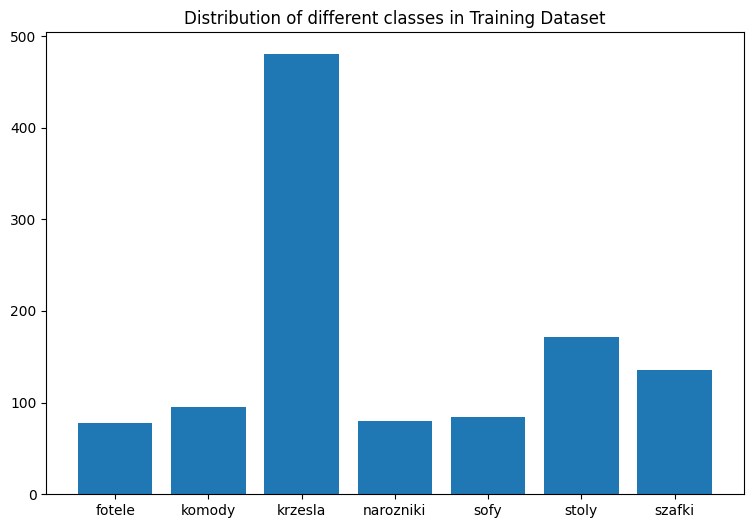

In [ ]:
image_folder = ['fotele', 'komody','krzesla', 'narozniki', 'sofy', 'stoly', 'szafki']
nimgs = {}
for i in image_folder:
    nimages = len(os.listdir('drive/MyDrive/project_computer_vision/data/train/' + i + '/'))
    nimgs[i] = nimages
plt.figure(figsize=(9, 6))
plt.bar(range(len(nimgs)), list(nimgs.values()), align='center')
plt.xticks(range(len(nimgs)), list(nimgs.keys()))
plt.title('Distribution of different classes in Training Dataset')
plt.show()

Visualisation by means of a bar chart of the amount of data per class in the test set.

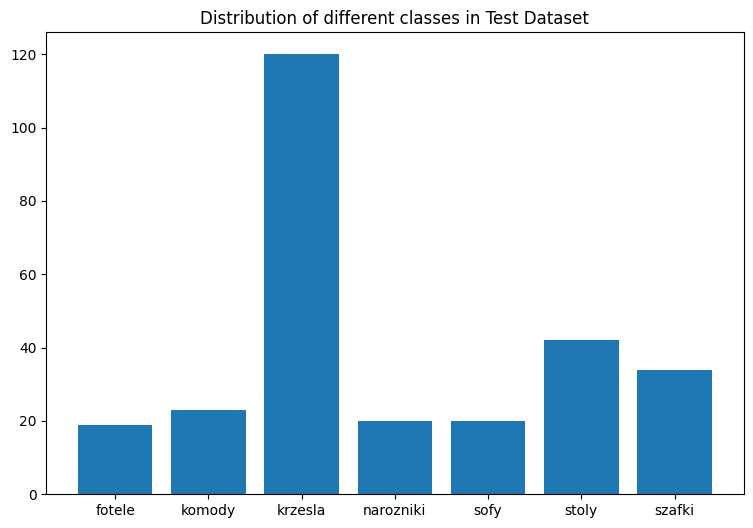

In [ ]:
nimgs = {}
for i in image_folder:
    nimages = len(os.listdir('drive/MyDrive/project_computer_vision/data/test/' + i + '/'))
    nimgs[i] = nimages
plt.figure(figsize=(9, 6))
plt.bar(range(len(nimgs)), list(nimgs.values()), align='center')
plt.xticks(range(len(nimgs)), list(nimgs.keys()))
plt.title('Distribution of different classes in Test Dataset')
plt.show()

We divide the data in such a way that each class is represented in each of the sets, i.e. training, validation and test sets.

The graphs show the breakdown of the sets, where 80% is the training set and 20% is the test set.

## Loading training, validation and test sets

Trening set

In [ ]:
path_train = 'drive/MyDrive/project_computer_vision/data/train'

batch_size = 32
img_height = 128
img_width = 128

In [ ]:
train_ds = keras.utils.image_dataset_from_directory(path_train,
                                                    validation_split = 0.2,
                                                    subset = 'training',
                                                    image_size = (img_height, img_width),
                                                    batch_size = batch_size,
                                                    label_mode = 'categorical',
                                                    seed = 5)

Found 1125 files belonging to 7 classes.
Using 900 files for training.


Validation set

In [ ]:
val_ds = keras.utils.image_dataset_from_directory(path_train,
                                                  validation_split = 0.2,
                                                  subset = 'validation',
                                                  image_size = (img_height, img_width),
                                                  batch_size = batch_size,
                                                  label_mode = 'categorical',
                                                  seed = 5)

Found 1125 files belonging to 7 classes.
Using 225 files for validation.


Test set

In [ ]:
path_test = 'drive/MyDrive/project_computer_vision/data/test'

test_ds = keras.utils.image_dataset_from_directory(path_test,
                                                  image_size = (img_height, img_width),
                                                  batch_size = batch_size,
                                                  label_mode = 'categorical',
                                                  seed = 5)

Found 278 files belonging to 7 classes.


##Data visualisation

Showing data and the label assigned to it.

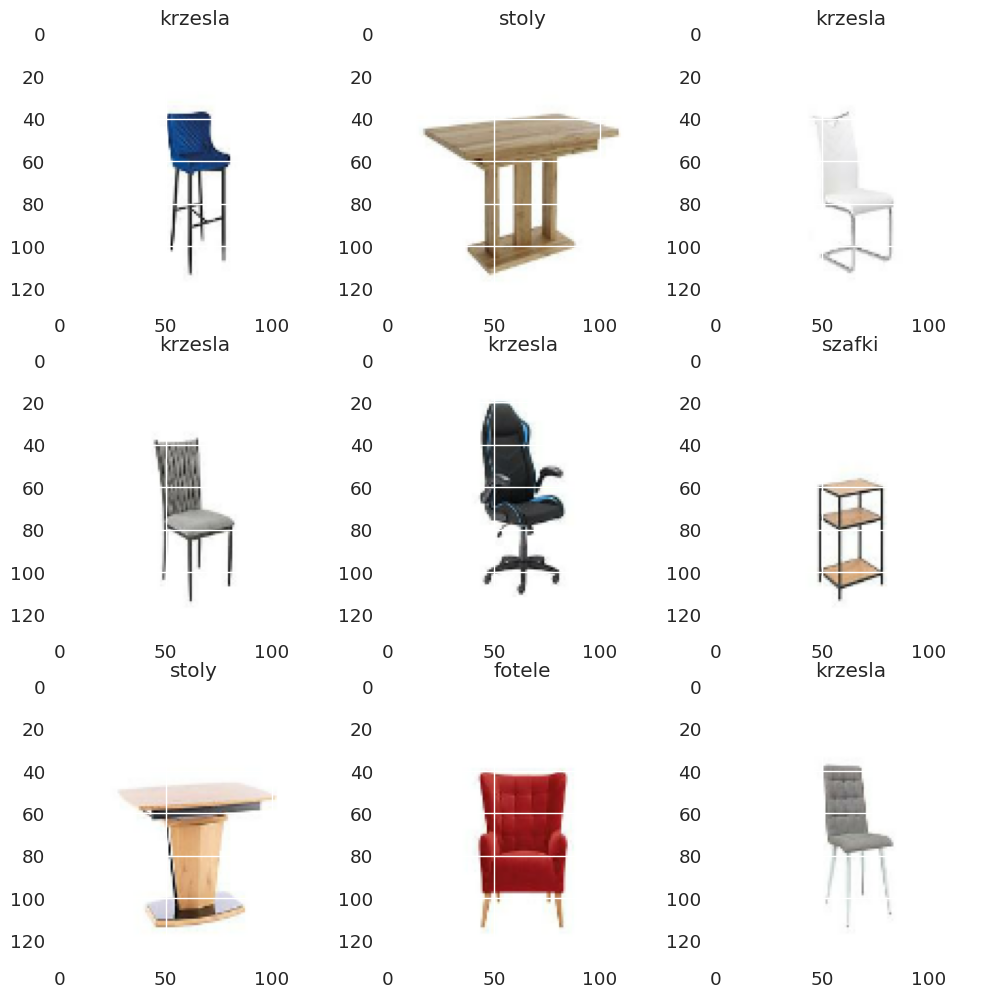

In [ ]:
class_names = train_ds.class_names

plt.figure(figsize=(12, 12))

for images, labels in train_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype('uint8'))
        plt.title(class_names[labels[i].numpy().tolist().index(1)])
plt.show()

# Functions - Functions for saving and loading models and training history

Model saving function



In [ ]:
path = 'drive/MyDrive/project_computer_vision/'
os.makedirs(path + 'model', exist_ok=True)

model_path = 'drive/MyDrive/project_computer_vision/model/'

def save_model(model_keras, model_path, name):
  model_keras.save(model_path + str(name) + '.keras')

Model loading function

In [ ]:
model_path = 'drive/MyDrive/project_computer_vision/model/'
model_list = ['model_1.keras', 'model_2.keras', 'model_3.keras', 'model_4.keras',
              'model_5.keras', 'model_6.keras', 'model_7.keras']


def load_all_models(model_list):
  loded_model_list = []
  for i in model_list:
    loded_model_list.append(keras.models.load_model(model_path + i))
  return loded_model_list

In [ ]:
loded_model_list = load_all_models(model_list)
model_1 = loded_model_list[0]
model_2 = loded_model_list[1]
model_3 = loded_model_list[2]
model_4 = loded_model_list[3]
model_5 = loded_model_list[4]
model_6 = loded_model_list[5]
model_7 = loded_model_list[6]

History saving function

In [ ]:
path = 'drive/MyDrive/project_computer_vision/'
os.makedirs(path + 'history', exist_ok=True)

model_history_path = 'drive/MyDrive/project_computer_vision/history/'

In [ ]:
def saving_history(history_number, name):
  np.save(f'drive/MyDrive/project_computer_vision/history/{name}' + '.npy', history_number)

History loading function

In [ ]:
model_history_path = 'drive/MyDrive/project_computer_vision/history/'
history_list = ['history_1.npy', 'history_2.npy', 'history_3.npy', 'history_4.npy', 'history_5.npy', 'history_6.npy', 'history_7.npy']


def load_history(history_list):
  loded_history_list = []
  for i in history_list:
    loded_history_list.append(np.load(model_history_path + i, allow_pickle='TRUE').item())
  return loded_history_list

In [ ]:
loded_history_list = load_history(history_list)
history_1 = loded_history_list[0]
history_2 = loded_history_list[1]
history_3 = loded_history_list[2]
history_4 = loded_history_list[3]
history_5 = loded_history_list[4]
history_6 = loded_history_list[5]
history_7 = loded_history_list[6]

Function drawing loss curves

In [ ]:
def plot_loss_curves_model(history_number, number_of_model):
  fig, ax = plt.subplots()

  plt.plot(history_number.epoch, history_number.history['val_loss'], 'b', label= f'History {number_of_model} - Validation Loss')
  plt.plot(history_number.epoch, history_number.history['loss'], 'b--', label= f'History {number_of_model} - Training Loss')

  plt.xlabel('Epochs')
  plt.ylabel('Loss')
  plt.title(f'Loss Curves - Model {number_of_model}')

  plt.legend()
  plt.show()

Function drawing acc curves

In [ ]:
def plot_accuracy_curves_model(history_number, number_of_model):
  fig, ax = plt.subplots()

  plt.plot(history_number.epoch, history_number.history['val_accuracy'], 'b', label= f'History {number_of_model} - Validation Accuracy')
  plt.plot(history_number.epoch, history_number.history['accuracy'], 'b--', label= f'History {number_of_model} - Training Accuracy')

  plt.xlabel('Epochs')
  plt.ylabel('ACC')
  plt.title(f'Accuracy Curves - Model {number_of_model}')

  plt.legend()
  plt.show()

#Models

The Sequential model is a type of deep learning model in the field of artificial intelligence and machine learning. It is one of the simplest and most commonly used models in building neural networks. The Sequential model is primarily used for building feedforward neural networks, where data flows sequentially from one layer to another.

Create a Sequential model using the add() method.

Rescaling, also known as normalization, is a common data preprocessing technique used to bring all the features of the input data to a similar scale

**Convolutional Layer**

2D convolution layer(Conv2D) creates a convolution kernel that is convolved with the layer input to produce a tensor of outputs.The convolutional layer is responsible for feature extraction from the input data, which is typically 2D data such as images.

The first argument is the number of filters (also known as kernels) in the convolutional layer.

The second argument is the size of each filter. In this case, each filter has a size of 3x3. Smaller filter sizes are commonly used to capture local patterns.

The padding parameter determines how the convolution is applied to the input. Setting it to 'same' means that zero-padding will be added to the input data in such a way that the output feature map will have the same spatial dimensions as the input. This helps in avoiding information loss at the edges of the input.

The input_shape parameter defines the shape of the input data that the model expects. In this case, the input data is assumed to be 3-channel (RGB) images with width img_width, height img_height, and 3 color channels (R, G, B).

 **Max-pooling**

Max-pooling is a down-sampling technique used to reduce the spatial dimensions of the feature maps while retaining the most important information. It helps in reducing the computational complexity of the model and aids in preventing overfitting. The argument passed to MaxPool2D represents the size of the pooling window. In this case, a 2x2 window is used for pooling. Max-pooling works by taking the maximum value within each window and discarding the other values.

**Flatten, Dense and Softmax Activation in CNNs**

The Flatten layer is another common layer in deep learning models, particularly in CNNs. Its purpose is to flatten the multi-dimensional input into a one-dimensional vector.

Dense(7): This adds a fully connected layer (Dense layer) with 7 units. Each neuron in this layer will be connected to all the neurons in the previous layer.

The softmax activation function is used for the output layer in multiclass classification problems. It converts the raw output scores of the neurons into a probability distribution, where each value represents the probability of the input belonging to a particular class.

## model_1 - Basic model

Baseline model checking of convolutional neural networks (CNN).

In [ ]:
model_1 = Sequential()

model_1.add(layers.Rescaling(1./255))
model_1.add(layers.Conv2D(32,(3,3),
                        padding='same',
                        activation='relu',
                        input_shape=(img_width, img_height, 3)))
model_1.add(layers.MaxPool2D((2,2)))

model_1.add(layers.Conv2D(16,(3,3),
                        padding='same',
                        activation='relu'))
model_1.add(layers.MaxPool2D((2,2)))


model_1.add(layers.Flatten())

model_1.add(layers.Dense(64, activation='relu'))
model_1.add(layers.Dense(7, activation='softmax'))

The compilation process is an important step in building a machine learning model using the Keras library (which is now a part of TensorFlow). It is performed before training the model and involves defining three key components of the model:

- **Optimizer**: The optimizer is responsible for updating the model's weights during the training process. Its task is to minimize the loss function by adjusting the model's weights based on the gradients of the loss function. In this case, we use the "adam" optimizer, which is a popular and effective optimizer commonly used in machine learning.

- **Loss function**: The loss function measures the deviation of the model's predictions from the true labels. The optimization aims to minimize this function to achieve the best model performance. For multi-class classification tasks, such as "categorical_crossentropy," this loss function is commonly used.

- **Metrics**: Metrics are additional indicators used to evaluate the model's performance but do not affect the actual training process. In this case, we use the "accuracy" metric, which is a popular measure of classification accuracy, representing the ratio of correctly classified samples to all samples.

After the model has been compiled, it is ready to start the training process using the *model_1.fit()* function by providing the appropriate training data and labels.

In [ ]:
model_1.compile(optimizer='adam',
                loss='categorical_crossentropy',
                metrics= ['accuracy'])


The code is executing the training process for a machine learning model. Explanation of the purpose of each parameter in the *model_1.fit()* function:

- **train_ds**: This parameter represents the training dataset. It contains input samples and their corresponding target (ground truth) labels. The model will be trained on this dataset to learn patterns and relationships between inputs and outputs.

- **validation_data**: This parameter is optional and represents the validation dataset. It is used to evaluate the model's performance on data that it has not seen during training. The model's performance on the validation data is monitored after each epoch to detect overfitting and assess generalization capabilities.

- **epochs**: This parameter specifies the number of epochs, which is the number of times the model will iterate over the entire training dataset during the training process. Each epoch consists of one forward pass and one backward pass (optimization step) through the entire dataset.

- **batch_size**: This parameter defines the number of samples that will be propagated through the model at once before updating the model's weights. It is common to use batch training instead of updating the weights after each individual sample to make the training process more efficient.

During the *model_1.fit()* process, the model will be trained using the training data (*train_ds*) by minimizing the defined loss function (specified during model compilation) using the selected optimizer (also specified during model compilation). The model's performance on the validation data (*val_ds*) will be evaluated after each epoch. The training process will repeat for the specified number of epochs, updating the model's weights to improve its performance over time.

The output of *model_1.fit()* is a *history* object that contains information about the model's performance during training, such as the loss and accuracy values for each epoch. This information can be useful for analyzing the training progress and identifying possible issues, like overfitting or underfitting.

In [ ]:
history_1 = model_1.fit(train_ds,
                        validation_data = val_ds,
                        epochs = 25,
                        batch_size= 32)

Epoch 1/25
29/29 [==============================] - 14s 432ms/step - loss: 1.7417 - accuracy: 0.3789 - val_loss: 1.4029 - val_accuracy: 0.4400
Epoch 2/25
29/29 [==============================] - 12s 403ms/step - loss: 1.0798 - accuracy: 0.5967 - val_loss: 0.9117 - val_accuracy: 0.6356
Epoch 3/25
29/29 [==============================] - 12s 421ms/step - loss: 0.7757 - accuracy: 0.7233 - val_loss: 0.6388 - val_accuracy: 0.7911
Epoch 4/25
29/29 [==============================] - 13s 425ms/step - loss: 0.5476 - accuracy: 0.8122 - val_loss: 0.5488 - val_accuracy: 0.8133
Epoch 5/25
29/29 [==============================] - 12s 422ms/step - loss: 0.4467 - accuracy: 0.8556 - val_loss: 0.4621 - val_accuracy: 0.8533
Epoch 6/25
29/29 [==============================] - 13s 424ms/step - loss: 0.3677 - accuracy: 0.8800 - val_loss: 0.4915 - val_accuracy: 0.8311
Epoch 7/25
29/29 [==============================] - 13s 422ms/step - loss: 0.2963 - accuracy: 0.9089 - val_loss: 0.4586 - val_accuracy: 0.8444

The *model_1.summary()* function is used to display a summary of the machine learning model's structure. After constructing the model (e.g., using the Keras or TensorFlow library), the *summary()* function provides a quick and concise overview of the built model.

The key information included in the summary is as follows:

- **Layer Name**: It shows the name of each layer in the model, making it easy to identify the layers present in the model.

- **Layer Type**: It specifies the type of each layer (e.g., dense, convolutional, recurrent, etc.), providing insight into the operations performed on data by each layer.

- **Output Shape**: It displays the dimensions of the output data from each layer, helping to understand how data changes as it passes through the model.

- **Parameters**: It shows the number of parameters (weights) in each layer and the total number of parameters in the entire model. These parameters are optimized during the learning process to allow the model to learn appropriate data representations.

- **Total params**: It presents the total number of parameters (i.e., weights and biases) in the model, enabling an assessment of the model's complexity and potential computational resource requirements.

The summary is particularly useful when we want to quickly understand the architecture and size of the model and ensure that it has been constructed correctly. It also helps analyze which layers have the most significant impact on solving the problem and where potential changes can be made to optimize the model.

In [ ]:
model_1.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_1 (Rescaling)     (None, 128, 128, 3)       0         
                                                                 
 conv2d_2 (Conv2D)           (None, 128, 128, 32)      896       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 64, 64, 32)       0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 64, 64, 16)        4624      
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 32, 32, 16)       0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 16384)            

The code you provided is used to evaluate the performance of the trained machine learning model on a test dataset. Let me explain the purpose of each line:

- **loss_1, accuracy_1 = model_1.evaluate(test_ds)**:
  - The *model_1.evaluate(test_ds)* function computes the loss and metrics (including accuracy) of the model on the test dataset (*test_ds*).
  - The variable *loss_1* will store the computed loss value, which indicates the difference between the model's predictions and the actual labels in the test dataset.
  - The variable *accuracy_1* will store the computed accuracy, which represents the percentage of correctly classified samples in the test dataset.
- **print("Test Accuracy:", accuracy_1)**:
  - This line prints the test accuracy of the model to the console or output terminal.
  - It shows how well the trained model performs on unseen data (test dataset).
  - The test accuracy is a crucial measure to assess the model's generalization capability, i.e., how well it can make accurate predictions on data it has never encountered during training.

The evaluation on the test dataset is a critical step to validate the model's performance on new, unseen data. It helps in understanding how well the model is likely to perform in real-world scenarios and whether it has generalized well to handle different data distributions beyond the training set. High accuracy on the test dataset indicates a good model, whereas significant performance discrepancies between training and test accuracy might suggest overfitting or underfitting issues.

In [ ]:
loss_1, accuracy_1 = model_1.evaluate(test_ds)
print('Test Accuracy:', accuracy_1)

9/9 [==============================] - 35s 180ms/step - loss: 0.3273 - accuracy: 0.9173
Test Accuracy: 0.9172661900520325


The **save_model(model_1, model_path, "model_1")** function is used to save a trained machine learning model to disk for future use or sharing.

Explanation of each parameter:

- **model_1**: This parameter represents the trained model that we want to save. The model have been previously defined and trained.

- **model_path**: This is the path to the folder where the model will be saved.

- **"model_1"**: This is the name of the model file under which it will be saved on disk. You can use any name that helps identify the saved model.

After executing the **save_model** function, the trained model will be saved in a format that allows it to be recreated later. This enables using and evaluating the model on new data without having to retrain it from scratch. Saving the model to disk is particularly important when the model requires a long training time or when it needs to be used in different environments or applications.

In [ ]:
save_model(model_1,model_path, 'model_1')

The function **saving_history(history_1, "history_1")** is used to save the history of the model's training process to disk. The history contains information about the model's performance during training, such as the values of the loss function and metrics (e.g., accuracy) on the training and validation datasets in each epoch.

Explanation of each parameter:

- **history_1**: This parameter represents the history of the model's training process, which includes the training results at different epochs. This history can be obtained as the output of the **model_1.fit()** function during model training.

- **"history_1"**: This is the file name under which the history will be saved on disk. You can use any name that helps identify the saved history.

Saving the training history is useful when we want to analyze the progress of the model's training and compare its performance on the training and validation datasets across different epochs. By saving the history, we can later reproduce and study how well the model learned or if there were any issues like overfitting or underfitting. Additionally, the saved history can be useful for presenting training results, archiving training data, or comparing models with different training parameters.

In [ ]:
saving_history(history_1, 'history_1')

The function **plot_loss_curves_model(history_1, 1)** is used to visualize the loss curves during the model training process.

Explanation of each parameter:

- **history_1**: This parameter represents the history of the model's training process, which contains information about the model's performance in each epoch. It is the output of the **model_1.fit() ** function during training.

- **1**: This parameter indicates the index of the model. It can be used if we have multiple models, and we want to compare their histories, or if we have only one model, and the index is used in the plot's name to identify a specific model.

Visualizing the loss curves aims to help understand how the loss value changes as the training progresses. The plot shows whether the model is learning correctly (reducing the loss) or if there might be overfitting (decreasing loss on the training set but increasing on the validation set). It also allows assessing whether the model is adequately trained, even after the loss curve stabilizes. Visualizing these curves helps in analyzing the model's performance and identifying appropriate points to stop the training (if necessary) to avoid overfitting and ensure model optimization.

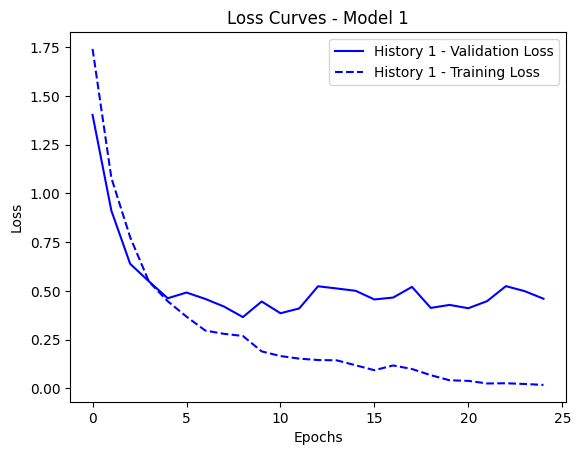

In [ ]:
plot_loss_curves_model(history_1, '1')

The function **plot_accuracy_curves_model(history_1, 1)** is used to visualize the accuracy curves during the model training process.

Visualizing the accuracy curves aims to help understand how the accuracy of the model changes as the training progresses. The plot shows whether the model is learning correctly (increasing accuracy) or if there might be overfitting (high accuracy on the training set but lower on the validation set). It also allows assessing the stability of the model's accuracy on the validation set, enabling the identification of an appropriate point to stop the training (if necessary) to avoid overfitting and achieve optimal model performance. Visualizing these curves is useful for analyzing the model's accuracy and helps in making decisions regarding further training or potential modifications to improve the results.

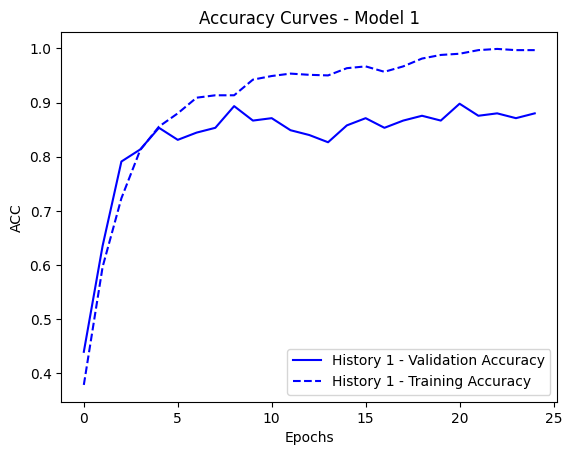

In [ ]:
plot_accuracy_curves_model(history_1, '1')

**CONCLUSIONS**:

- Overfitting has occurred. The training data set is probably too small compared to the validation data set. Therefore, the data set should be expanded to include images of furniture.
This means that the network is 'learning the training set' instead of generalising the classification.
- The 'loss' values decrease as the epochs progress, meaning that the model gradually adapts to the training data.
- The cost function decreases as training progresses, indicating that the model is improving its predictions as it gains experience.
- The value of the cost function on the validation set (val_loss) also decreases as training progresses, indicating that the model generally improves its estimates on data not used for training.
- The model achieves some stability around epochs 10-15, suggesting that further epochs of training may have less impact on improving model performance.
- Finally, the model achieves high accuracy on the validation set (around 88-89%) and a low cost function value (around 0.4-0.5), indicating that the model is able to make good predictions on new, unseen data.
- Overall, the results suggest that the model learns well and converges to acceptable results as training progresses.

## model_2 - Increased number of neurons

More neurons increase the model's capacity to capture complex patterns and relationships in the data. A larger neural network can represent more intricate functions, which can be beneficial for tasks with high complexity.

In [ ]:
model_2 = Sequential()

model_2.add(layers.Rescaling(1./255))
model_2.add(layers.Conv2D(128,(3,3),
                        padding='valid',
                        activation='relu',
                        input_shape=(img_width, img_height, 3)))
model_2.add(layers.MaxPool2D((2,2)))

model_2.add(layers.Conv2D(64,(3,3),
                        padding='valid',
                        activation='relu'))
model_2.add(layers.MaxPool2D((2,2)))


model_2.add(layers.Flatten())

model_2.add(layers.Dense(256, activation='relu'))
model_2.add(layers.Dense(7, activation='softmax'))

In [ ]:
model_2.compile(optimizer='adam',
                loss='categorical_crossentropy',
                metrics= ['accuracy'])

In [ ]:
history_2 = model_2.fit(train_ds,
                        validation_data= val_ds,
                        epochs = 25,
                        batch_size= 32)

Epoch 1/25
29/29 [==============================] - 266s 7s/step - loss: 1.8852 - accuracy: 0.4533 - val_loss: 1.0662 - val_accuracy: 0.5733
Epoch 2/25
29/29 [==============================] - 116s 4s/step - loss: 0.6969 - accuracy: 0.7544 - val_loss: 0.6510 - val_accuracy: 0.7867
Epoch 3/25
29/29 [==============================] - 117s 4s/step - loss: 0.4117 - accuracy: 0.8567 - val_loss: 0.5547 - val_accuracy: 0.8089
Epoch 4/25
29/29 [==============================] - 107s 4s/step - loss: 0.3000 - accuracy: 0.8944 - val_loss: 0.4971 - val_accuracy: 0.8444
Epoch 5/25
29/29 [==============================] - 114s 4s/step - loss: 0.2662 - accuracy: 0.9100 - val_loss: 0.5683 - val_accuracy: 0.8267
Epoch 6/25
29/29 [==============================] - 102s 4s/step - loss: 0.2037 - accuracy: 0.9233 - val_loss: 0.4751 - val_accuracy: 0.8533
Epoch 7/25
29/29 [==============================] - 105s 4s/step - loss: 0.1929 - accuracy: 0.9289 - val_loss: 0.6494 - val_accuracy: 0.8444
Epoch 8/25
29

In [ ]:
model_2.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling (Rescaling)       (None, 128, 128, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 126, 126, 128)     3584      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 63, 63, 128)      0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 61, 61, 64)        73792     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 30, 30, 64)       0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 57600)             0

In [ ]:
loss_2, accuracy_2 = model_2.evaluate(test_ds)
print('Test Accuracy:', accuracy_2)

9/9 [==============================] - 7s 679ms/step - loss: 0.6482 - accuracy: 0.8993
Test Accuracy: 0.8992805480957031


In [ ]:
save_model(model_2,model_path, 'model_2')

In [ ]:
saving_history(history_2, 'history_2')

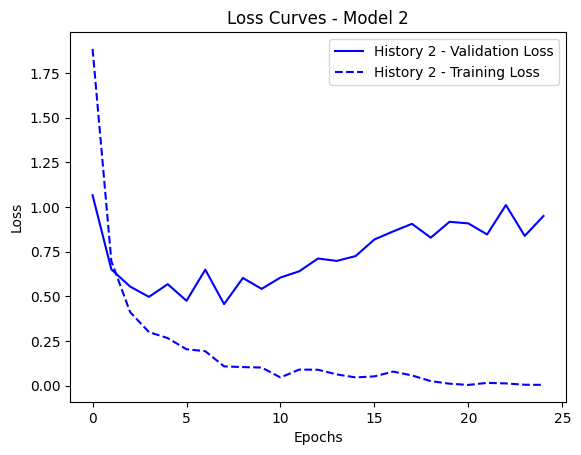

In [ ]:
plot_loss_curves_model(history_2, '2')

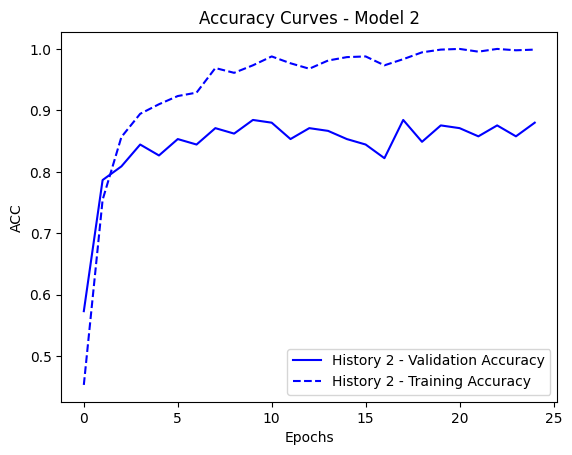

In [ ]:
plot_accuracy_curves_model(history_2, '2')

**CONCLUSIONS**:


Overfitting has occurred. Increasing the number of neurons worsens the loss curve for the training and validation sets.
The difference between the validation and training loss is greater than for the network from model_1. This means that the network is 'learning the training set' rather than generalising the classification.

The final accuracy on the validation set of around 88-89% suggests that the model has performed well and is able to correctly predict classes.

## model_3 - Reduced number of neurons

Reducing the number of neurons in a Convolutional Neural Network can be a useful strategy in certain scenarios. Decreasing the number of neurons in a CNN can lead to a more compact and computationally efficient model, which is particularly beneficial when dealing with limited computational resources or memory constraints.

In [ ]:
model_3 = Sequential()

model_3.add(layers.Rescaling(1./255))
model_3.add(layers.Conv2D(16,(3,3),
                        padding='valid',
                        activation='relu',
                        input_shape=(img_width, img_height, 3)))
model_3.add(layers.MaxPool2D((2,2)))

model_3.add(layers.Conv2D(16,(3,3),
                        padding='valid',
                        activation='relu'))
model_3.add(layers.MaxPool2D((2,2)))


model_3.add(layers.Flatten())

model_3.add(layers.Dense(32, activation='relu'))
model_3.add(layers.Dense(7, activation='softmax'))

In [ ]:
model_3.compile(optimizer='adam',
                loss='categorical_crossentropy',
                metrics= ['accuracy'])

In [ ]:
history_3 = model_3.fit(train_ds,
                        validation_data= val_ds,
                        epochs = 25,
                        batch_size= 32)

Epoch 1/25
29/29 [==============================] - 79s 2s/step - loss: 1.4741 - accuracy: 0.4744 - val_loss: 1.0968 - val_accuracy: 0.5956
Epoch 2/25
29/29 [==============================] - 8s 254ms/step - loss: 0.8852 - accuracy: 0.6933 - val_loss: 0.7376 - val_accuracy: 0.7244
Epoch 3/25
29/29 [==============================] - 8s 272ms/step - loss: 0.5449 - accuracy: 0.8211 - val_loss: 0.6480 - val_accuracy: 0.7956
Epoch 4/25
29/29 [==============================] - 7s 227ms/step - loss: 0.4030 - accuracy: 0.8800 - val_loss: 0.4542 - val_accuracy: 0.8622
Epoch 5/25
29/29 [==============================] - 7s 240ms/step - loss: 0.3066 - accuracy: 0.9056 - val_loss: 0.5840 - val_accuracy: 0.7956
Epoch 6/25
29/29 [==============================] - 8s 275ms/step - loss: 0.3137 - accuracy: 0.8944 - val_loss: 0.3933 - val_accuracy: 0.8844
Epoch 7/25
29/29 [==============================] - 8s 275ms/step - loss: 0.2174 - accuracy: 0.9311 - val_loss: 0.3883 - val_accuracy: 0.8756
Epoch 8/

In [ ]:
model_3.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling (Rescaling)       (None, 128, 128, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 126, 126, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 63, 63, 16)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 61, 61, 16)        2320      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 30, 30, 16)       0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 14400)             0

In [ ]:
loss_3, accuracy_3 = model_3.evaluate(test_ds)
print('Test Accuracy:', accuracy_3)

9/9 [==============================] - 2s 148ms/step - loss: 0.6012 - accuracy: 0.8453
Test Accuracy: 0.8453237414360046


In [ ]:
save_model(model_3,model_path, 'model_3')

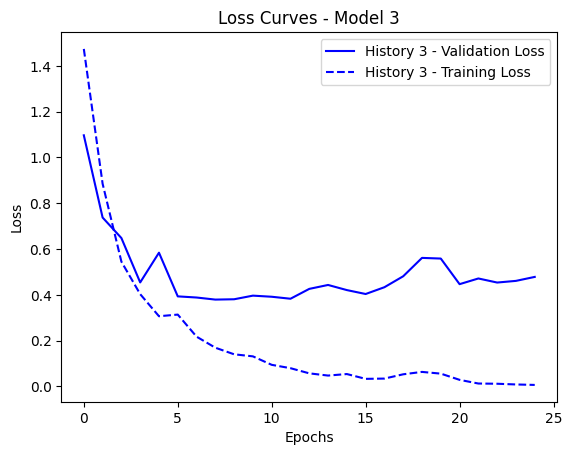

In [ ]:
plot_loss_curves_model(history_3, '3')

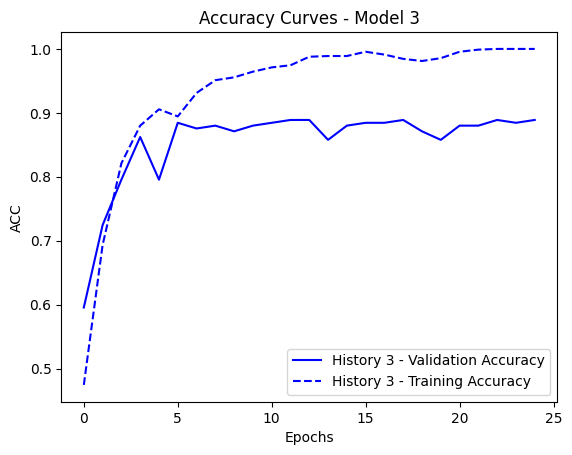

In [ ]:
plot_accuracy_curves_model(history_3, '3')

**CONCLUSIONS**:

Reducing the number of neurons in a given layer significantly reduced the accuracy of the model. The difference between validation and training loss is greater than for networks with a larger architecture (*model_1* and *model_2*).

## model_4 - Kernel (4, 4)

A kernel of size 4x4 means that the convolutional layer will look at a local region of the input data that has a spatial extent of 4x4 pixels at a time. Smaller kernel sizes capture fine-grained details, while larger kernel sizes can capture more global patterns in the input data. However, the choice of kernel size also affects the number of learnable parameters in the model and, consequently, the model's complexity and training time.

In [ ]:
model_4 = Sequential()

model_4.add(layers.Rescaling(1./255))
model_4.add(layers.Conv2D(32,(4,4),
                        padding='same',
                        activation='relu',
                        input_shape=(img_width, img_height, 3)))
model_4.add(layers.MaxPool2D((2,2)))

model_4.add(layers.Conv2D(16,(4,4),
                        padding='same',
                        activation='relu'))
model_4.add(layers.MaxPool2D((2,2)))


model_4.add(layers.Flatten())

model_4.add(layers.Dense(64, activation='relu'))
model_4.add(layers.Dense(7, activation='softmax'))

In [ ]:
model_4.compile(optimizer='adam',
                loss='categorical_crossentropy',
                metrics= ['accuracy'])

In [ ]:
history_4 = model_4.fit(train_ds,
                        validation_data = val_ds,
                        epochs = 25,
                        batch_size= 32)

Epoch 1/25
29/29 [==============================] - 30s 981ms/step - loss: 1.5381 - accuracy: 0.4744 - val_loss: 1.0110 - val_accuracy: 0.5911
Epoch 2/25
29/29 [==============================] - 28s 977ms/step - loss: 0.8043 - accuracy: 0.7244 - val_loss: 0.6707 - val_accuracy: 0.7867
Epoch 3/25
29/29 [==============================] - 29s 987ms/step - loss: 0.6265 - accuracy: 0.7667 - val_loss: 0.5735 - val_accuracy: 0.8000
Epoch 4/25
29/29 [==============================] - 29s 998ms/step - loss: 0.4498 - accuracy: 0.8500 - val_loss: 0.5813 - val_accuracy: 0.7956
Epoch 5/25
29/29 [==============================] - 28s 977ms/step - loss: 0.4311 - accuracy: 0.8478 - val_loss: 0.4388 - val_accuracy: 0.8578
Epoch 6/25
29/29 [==============================] - 29s 979ms/step - loss: 0.2736 - accuracy: 0.9078 - val_loss: 0.4143 - val_accuracy: 0.8844
Epoch 7/25
29/29 [==============================] - 29s 978ms/step - loss: 0.2259 - accuracy: 0.9256 - val_loss: 0.4013 - val_accuracy: 0.8756

In [ ]:
model_4.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_1 (Rescaling)     (None, 128, 128, 3)       0         
                                                                 
 conv2d_5 (Conv2D)           (None, 128, 128, 32)      1568      
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 64, 64, 32)       0         
 2D)                                                             
                                                                 
 conv2d_6 (Conv2D)           (None, 64, 64, 16)        8208      
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 32, 32, 16)       0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 16384)            

In [ ]:
loss_4, accuracy_4 = model_4.evaluate(test_ds)
print('Test Accuracy:', accuracy_4)

9/9 [==============================] - 2s 196ms/step - loss: 0.3772 - accuracy: 0.8957
Test Accuracy: 0.8956834673881531


In [ ]:
save_model(model_4, model_path, 'model_4')

In [ ]:
saving_history(history_4, 'history_4')

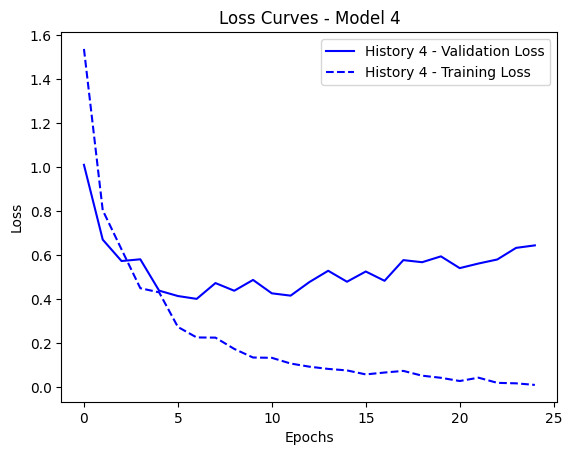

In [ ]:
plot_loss_curves_model(history_4, '4')

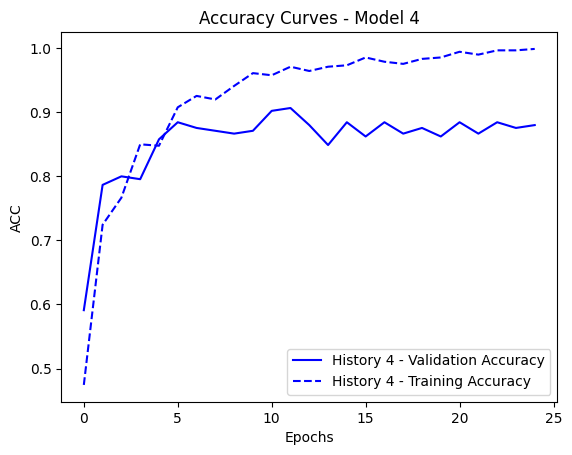

In [ ]:
plot_accuracy_curves_model(history_4, '4')

**CONCLUSIONS:**

Changing the kernel size from 3x3 to 4x4 and observing a deterioration in performance on the test set is not uncommon. The reason for this outcome can be attributed to several factors:

* **Receptive Field Size**: A 4x4 kernel has a larger receptive field compared to a
3x3 kernel. It means that the 4x4 kernel looks at a broader region of the input data during convolution. If the data contains more fine-grained details and local patterns, a larger kernel might miss or blur those important features, leading to degraded performance.

* **Model Complexity**: Increasing the kernel size from 3x3 to 4x4 increases the number of parameters in the model. This added complexity can lead to overfitting, especially if the training data is limited. Overfitting occurs when the model becomes too specific to the training data and fails to generalize well to unseen test data.

* **Limited Data**: If the size of the dataset is small, a larger kernel size can exacerbate the problem of overfitting. With limited data, it becomes more challenging for the model to learn meaningful patterns from the data, and a smaller kernel size may offer better generalization.

## model_5 - Dropout (0.5) - 25 epochs

**Dropout** is a regularisation technique used in neural networks to help prevent model overlearning. When learning a neural network, dropout randomly disables (zeros out) some units (neurons) in the hidden layers during each training iteration.

The idea behind this is that during model learning, each unit is learned independently of the others. By turning off random units during training, the remaining units have to learn a better representation of the data, as they cannot rely on other units that have been turned off. Thus, the model becomes more flexible and generalises better to new data.

Dropout acts as a kind of regularisation because it forces the model to average the results with different combinations of units during prediction, which helps to reduce over-sensitivity to specific neuron connections. In this way, dropout can help reduce overlearning effects and improve the generalisability of the model on new data.

In [ ]:
model_5 = Sequential()

model_5.add(layers.Rescaling(1./255))
model_5.add(layers.Conv2D(32,(3,3),
                          padding='valid',
                          activation='relu',
                          input_shape=(img_width, img_height, 3)))
model_5.add(layers.MaxPool2D((2,2)))
model_5.add(layers.Dropout(0.5))

model_5.add(layers.Conv2D(16,(3,3),
                          padding='valid',
                          activation='relu'))
model_5.add(layers.MaxPool2D((2,2)))
model_5.add(layers.Dropout(0.5))

model_5.add(layers.Flatten())

model_5.add(layers.Dense(64,
                         activation='relu'))


model_5.add(layers.Dense(7, activation='softmax'))

In [ ]:
model_5.compile(optimizer='adam',
                loss='categorical_crossentropy',
                metrics= ['accuracy'])

In [ ]:
history_5 = model_5.fit(train_ds,
                        validation_data= val_ds,
                        epochs = 25,
                        batch_size= 32)

Epoch 1/25
29/29 [==============================] - 147s 5s/step - loss: 2.1714 - accuracy: 0.3922 - val_loss: 1.9373 - val_accuracy: 0.4222
Epoch 2/25
29/29 [==============================] - 23s 769ms/step - loss: 1.6308 - accuracy: 0.4267 - val_loss: 1.9374 - val_accuracy: 0.3689
Epoch 3/25
29/29 [==============================] - 22s 760ms/step - loss: 1.4554 - accuracy: 0.4622 - val_loss: 1.6731 - val_accuracy: 0.5511
Epoch 4/25
29/29 [==============================] - 22s 763ms/step - loss: 1.1692 - accuracy: 0.5800 - val_loss: 1.0278 - val_accuracy: 0.6800
Epoch 5/25
29/29 [==============================] - 23s 778ms/step - loss: 0.8908 - accuracy: 0.6811 - val_loss: 1.3356 - val_accuracy: 0.6622
Epoch 6/25
29/29 [==============================] - 23s 772ms/step - loss: 0.8131 - accuracy: 0.7011 - val_loss: 0.8220 - val_accuracy: 0.7600
Epoch 7/25
29/29 [==============================] - 23s 770ms/step - loss: 0.6475 - accuracy: 0.7600 - val_loss: 0.7815 - val_accuracy: 0.7600
E

In [ ]:
model_5.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling (Rescaling)       (None, 128, 128, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 126, 126, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 63, 63, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 63, 63, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 61, 61, 16)        4624      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 30, 30, 16)       0         
 2D)                                                    

In [ ]:
loss_5, accuracy_5 = model_5.evaluate(test_ds)
print('Test Accuracy:', accuracy_5)

9/9 [==============================] - 2s 166ms/step - loss: 0.4808 - accuracy: 0.8453
Test Accuracy: 0.8453237414360046


In [ ]:
save_model(model_5, model_path, 'model_5')

In [ ]:
saving_history(history_5, 'history_5')

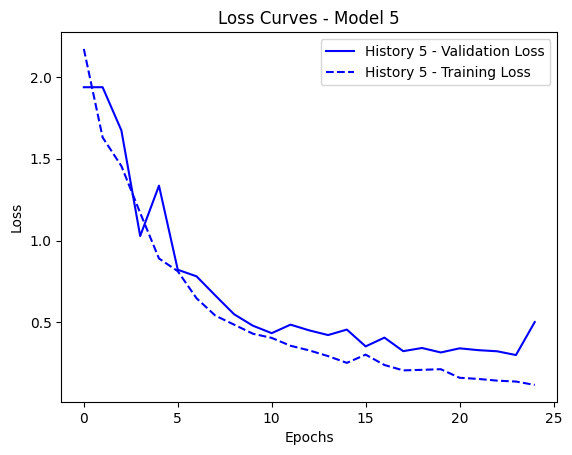

In [ ]:
plot_loss_curves_model(history_5, '5')

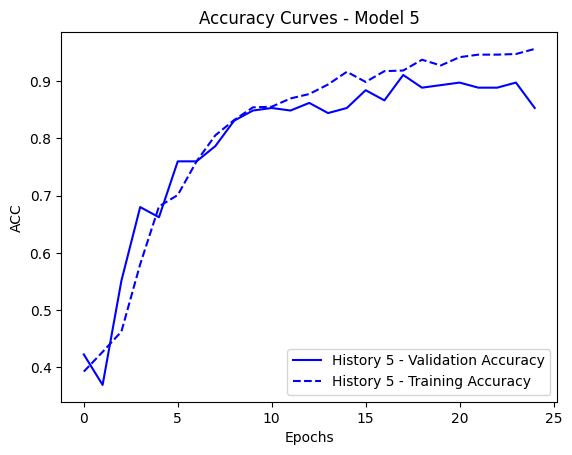

In [ ]:
plot_accuracy_curves_model(history_5, '5')

**CONCLUSIONS**:

- As the curves get closer together, you will notice an increase in the number of epochs. In the next model the number of epochs will be increased to get better results on the validation set and to train the model more.
- The difference between the accuracies on the training set and the validation set is relatively small, and the accuracy on the validation set reaches acceptable levels. There is no clear evidence of overfitting or underfitting.
- The addition of dropout layers to the model (factor 0.5) helps to control overfitting by randomly switching off neurons during training.
Despite some differences between the accuracies of the two sets, we see an improvement in the generalisation of the model as training progresses.
- The model appears to be well trained, but there is potential for further optimisation, particularly in terms of improving generalisation and achieving higher accuracy on the validation set.

## model_6 - Dropout (0.5) -  50 epochs

In [ ]:
model_6 = Sequential()

model_6.add(layers.Rescaling(1./255))
model_6.add(layers.Conv2D(32,(3,3),
                          padding='valid',
                          activation='relu',
                          input_shape=(img_width, img_height, 3)))
model_6.add(layers.MaxPool2D((2,2)))
model_6.add(layers.Dropout(0.5))

model_6.add(layers.Conv2D(16,(3,3),
                          padding='valid',
                          activation='relu'))
model_6.add(layers.MaxPool2D((2,2)))
model_6.add(layers.Dropout(0.5))

model_6.add(layers.Flatten())

model_6.add(layers.Dense(64,
                         activation='relu'))

model_6.add(layers.Dense(7, activation='softmax'))

In [ ]:
model_6.compile(optimizer='adam',
                loss='categorical_crossentropy',
                metrics= ['accuracy'])

In [ ]:
history_6 = model_6.fit(train_ds,
                        validation_data= val_ds,
                        epochs = 50,
                        batch_size= 32)

Epoch 1/50
29/29 [==============================] - 24s 761ms/step - loss: 1.7872 - accuracy: 0.3922 - val_loss: 1.9400 - val_accuracy: 0.3511
Epoch 2/50
29/29 [==============================] - 22s 744ms/step - loss: 1.4296 - accuracy: 0.4689 - val_loss: 1.3922 - val_accuracy: 0.5067
Epoch 3/50
29/29 [==============================] - 24s 780ms/step - loss: 1.0722 - accuracy: 0.5967 - val_loss: 1.0605 - val_accuracy: 0.7289
Epoch 4/50
29/29 [==============================] - 23s 772ms/step - loss: 0.8054 - accuracy: 0.7056 - val_loss: 0.7775 - val_accuracy: 0.7378
Epoch 5/50
29/29 [==============================] - 23s 758ms/step - loss: 0.6349 - accuracy: 0.7733 - val_loss: 0.7863 - val_accuracy: 0.7511
Epoch 6/50
29/29 [==============================] - 23s 766ms/step - loss: 0.5507 - accuracy: 0.8011 - val_loss: 0.7111 - val_accuracy: 0.7689
Epoch 7/50
29/29 [==============================] - 22s 757ms/step - loss: 0.4941 - accuracy: 0.8356 - val_loss: 0.5722 - val_accuracy: 0.8044

In [ ]:
model_6.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_1 (Rescaling)     (None, 128, 128, 3)       0         
                                                                 
 conv2d_2 (Conv2D)           (None, 126, 126, 32)      896       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 63, 63, 32)       0         
 2D)                                                             
                                                                 
 dropout_2 (Dropout)         (None, 63, 63, 32)        0         
                                                                 
 conv2d_3 (Conv2D)           (None, 61, 61, 16)        4624      
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 30, 30, 16)       0         
 2D)                                                  

In [ ]:
loss_6, accuracy_6 = model_6.evaluate(test_ds)
print('Test Accuracy:', accuracy_6)

9/9 [==============================] - 3s 295ms/step - loss: 0.3826 - accuracy: 0.8957
Test Accuracy: 0.8956834673881531


In [ ]:
save_model(model_6, model_path, 'model_6')

In [ ]:
saving_history(history_6, 'history_6')

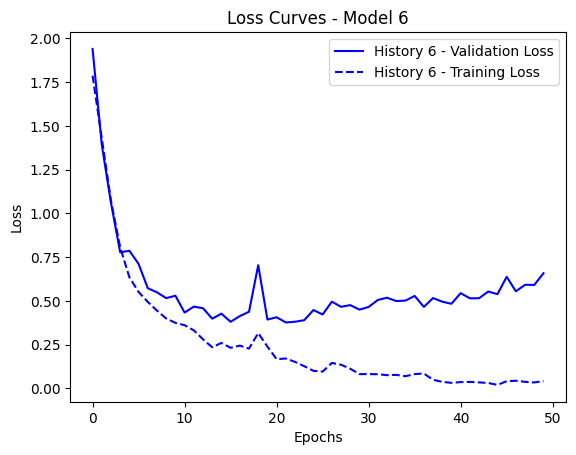

In [ ]:
plot_loss_curves_model(history_6, '6')

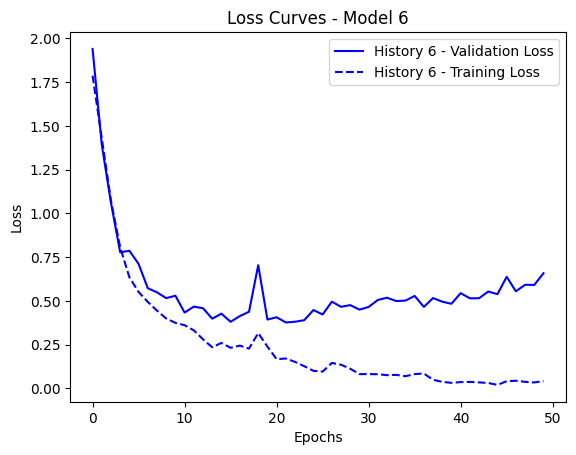

In [ ]:
plot_loss_curves_model(history_6, 6)

**CONCLUSIONS**:

Increasing the number of epochs did not improve the results but increased overfitting.

## model_7 - Regularisation (0.01)

**Regularisation** in the context of machine learning refers to techniques used to prevent model overfitting. Overfitting occurs when a model is over-fitted to training data and does not generalise well to new data.

There are many regularisation methods that can be used to control overfitting and improve the generalisation ability of the model. Here are some popular regularisation techniques:

**L1 and L2 regularisation (L1 and L2 regularisation)**: These techniques add a penalty to the cost function for large values of the model weights. L1 regularisation promotes sparse weights, eliminating irrelevant features, while L2 regularisation encourages smaller but non-zero weights. Both methods help to reduce excessive model complexity.

Regularisation is an important tool in the fight against overfitting and helps to create more generic and useful models. Depending on the specific problem and type of data, different regularisation techniques can be used to obtain optimal results.

In [ ]:
model_7 = Sequential()

model_7.add(layers.Rescaling(1./255))


model_7.add(layers.Conv2D(32,(3,3),
                          padding='valid',
                          activation='relu',
                          kernel_regularizer=keras.regularizers.l2(0.01),
                          input_shape=(img_width, img_height, 3)))

model_7.add(layers.MaxPool2D((2,2)))

model_7.add(layers.Conv2D(16,(3,3),
                          padding='valid',
                          activation='relu',
                          kernel_regularizer=keras.regularizers.l2(0.01)))
model_7.add(layers.MaxPool2D((2,2)))


model_7.add(layers.Flatten())

model_7.add(layers.Dense(64,
                         kernel_regularizer=keras.regularizers.l2(0.01),
                         activation='relu'))

model_7.add(layers.Dense(7, activation='softmax'))

In [ ]:
model_7.compile(optimizer='adam',
                loss='categorical_crossentropy',
                metrics= ['accuracy'])

In [ ]:
history_7 = model_7.fit(train_ds,
                        validation_data= val_ds,
                        epochs = 25,
                        batch_size= 32)

Epoch 1/25
29/29 [==============================] - 12s 361ms/step - loss: 2.3013 - accuracy: 0.4356 - val_loss: 1.6138 - val_accuracy: 0.6133
Epoch 2/25
29/29 [==============================] - 12s 390ms/step - loss: 1.3332 - accuracy: 0.7022 - val_loss: 1.1331 - val_accuracy: 0.8044
Epoch 3/25
29/29 [==============================] - 12s 397ms/step - loss: 0.9851 - accuracy: 0.8244 - val_loss: 0.9699 - val_accuracy: 0.8044
Epoch 4/25
29/29 [==============================] - 12s 393ms/step - loss: 0.8392 - accuracy: 0.8567 - val_loss: 0.8542 - val_accuracy: 0.8444
Epoch 5/25
29/29 [==============================] - 11s 369ms/step - loss: 0.7250 - accuracy: 0.9078 - val_loss: 0.8023 - val_accuracy: 0.8533
Epoch 6/25
29/29 [==============================] - 12s 398ms/step - loss: 0.6740 - accuracy: 0.9078 - val_loss: 0.8511 - val_accuracy: 0.8133
Epoch 7/25
29/29 [==============================] - 12s 399ms/step - loss: 0.6388 - accuracy: 0.9111 - val_loss: 0.7784 - val_accuracy: 0.8178

In [ ]:
model_7.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_4 (Rescaling)     (None, 128, 128, 3)       0         
                                                                 
 conv2d_8 (Conv2D)           (None, 126, 126, 32)      896       
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 63, 63, 32)       0         
 2D)                                                             
                                                                 
 conv2d_9 (Conv2D)           (None, 61, 61, 16)        4624      
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 30, 30, 16)       0         
 2D)                                                             
                                                                 
 flatten_4 (Flatten)         (None, 14400)            

In [ ]:
loss_7, accuracy_7 = model_7.evaluate(test_ds)
print('Test Accuracy:', accuracy_7)

9/9 [==============================] - 2s 167ms/step - loss: 0.6462 - accuracy: 0.8597
Test Accuracy: 0.8597122430801392


In [ ]:
save_model(model_7, model_path, 'model_7')

In [ ]:
saving_history(history_7, 'history_7')

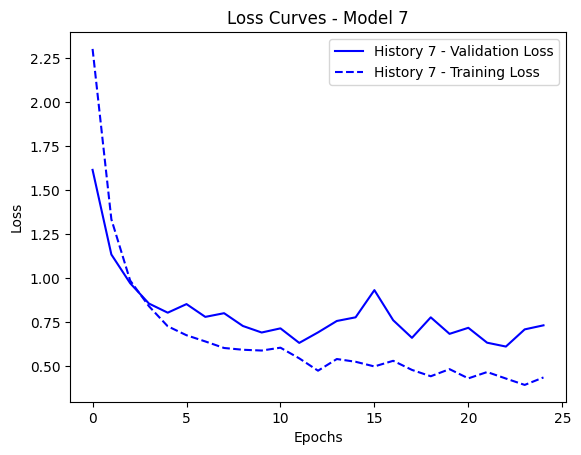

In [ ]:
plot_loss_curves_model(history_7, '7')

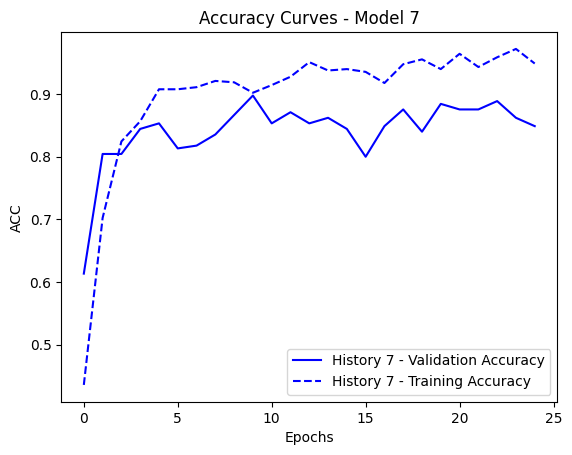

In [ ]:
plot_accuracy_curves_model(history_7, '7')

**CONCLUSIONS**:

In the example given, adding regularisation does not improve the results for a learning rate = 0.01. It is worth trying to find a learning rate that gives better results on the validation set.

L2 regularisation has been applied to the model by adding regularisation weights in the Conv2D and Dense layers. This helps to control for potential overfitting.

## Transfer Learning

Transfer learning is a technique in deep learning that involves using pre-trained models as a starting point for a new task or problem. Instead of building a neural network from scratch and training it on a large dataset, transfer learning allows us to leverage the knowledge gained from training a model on a related task or a large dataset.

The general idea behind transfer learning is that features learned by a model on one task can be useful for another task, especially when the datasets for the two tasks share some similarities. By using pre-trained models, we can significantly reduce the amount of data and time required for training, and often achieve better performance on the new task.

The key benefits of transfer learning include:
* Reduced training time and data requirements since you start with pre-trained weights.
* Improved generalization on the new task, especially when the new dataset is
small or similar to the original dataset.





### model_8 Transfer Learning (epochs = 10)

In [ ]:
efficient_model = EfficientNetB0(include_top = False,
                                 weights = 'imagenet',
                                 input_shape = (img_height, img_width,  3))

16705208/16705208 [==============================] - 0s 0us/step


In [ ]:
model_8 = Sequential()

model_8.add(efficient_model)
model_8.add(layers.Flatten())

model_8.add(layers.Dense(64, activation='relu'))
model_8.add(layers.Dense(7, activation='softmax'))

In [ ]:
model_8.compile(optimizer='adam',
                loss='categorical_crossentropy',
                metrics = ['accuracy'])

In [ ]:
model_8.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 efficientnetb0 (Functional)  (None, 4, 4, 1280)       4049571   
                                                                 
 flatten (Flatten)           (None, 20480)             0         
                                                                 
 dense (Dense)               (None, 64)                1310784   
                                                                 
 dense_1 (Dense)             (None, 7)                 455       
                                                                 
Total params: 5,360,810
Trainable params: 5,318,787
Non-trainable params: 42,023
_________________________________________________________________


In [ ]:
history_8 = model_8.fit(train_ds,
                        validation_data = val_ds,
                        epochs = 10,
                        batch_size = 32)

Epoch 1/10
29/29 [==============================] - 208s 5s/step - loss: 0.6890 - accuracy: 0.7844 - val_loss: 0.5855 - val_accuracy: 0.8133
Epoch 2/10
29/29 [==============================] - 113s 4s/step - loss: 0.1935 - accuracy: 0.9300 - val_loss: 0.5845 - val_accuracy: 0.7956
Epoch 3/10
29/29 [==============================] - 114s 4s/step - loss: 0.1657 - accuracy: 0.9422 - val_loss: 0.2146 - val_accuracy: 0.9333
Epoch 4/10
29/29 [==============================] - 117s 4s/step - loss: 0.1687 - accuracy: 0.9522 - val_loss: 0.3055 - val_accuracy: 0.9156
Epoch 5/10
29/29 [==============================] - 113s 4s/step - loss: 0.1063 - accuracy: 0.9656 - val_loss: 0.2814 - val_accuracy: 0.9422
Epoch 6/10
29/29 [==============================] - 116s 4s/step - loss: 0.2605 - accuracy: 0.9411 - val_loss: 0.7489 - val_accuracy: 0.8711
Epoch 7/10
29/29 [==============================] - 110s 4s/step - loss: 0.3236 - accuracy: 0.9111 - val_loss: 1.1858 - val_accuracy: 0.8622
Epoch 8/10
29

In [ ]:
loss_8, accuracy_8 = model_8.evaluate(test_ds)
print('Test Accuracy:', accuracy_8)

9/9 [==============================] - 6s 673ms/step - loss: 0.3432 - accuracy: 0.9388
Test Accuracy: 0.9388489127159119


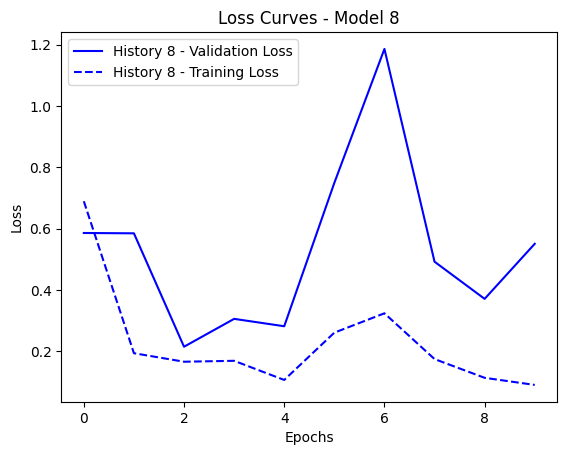

In [ ]:
plot_loss_curves_model(history_8, '8')

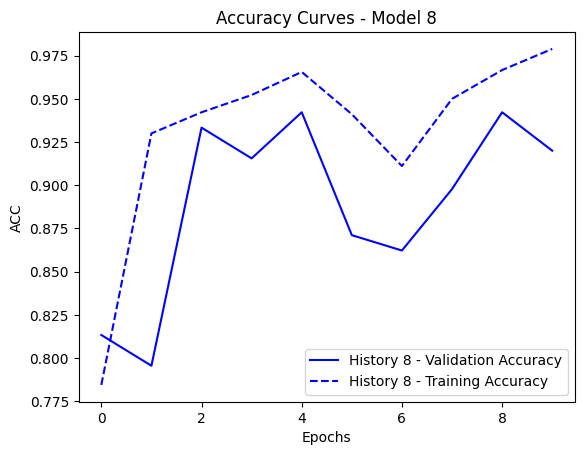

In [ ]:
plot_accuracy_curves_model(history_8, '8')

**CONCLUSIONS**:

- The approaching curves show a positive learning curve, so the number of epochs can be increased to give the model a chance to train. In the next model the number of epochs is increased to get better results on the validation set.
- The model achieves a very good accuracy of about 92% on the validation set. This is a very good result.
- The use of a pre-trained model architecture (e.g. EfficientNet) as part of the main model layer (without dense classification layers) is beneficial, as this type of model (pre-trained model) is able to extract relevant features from the images, which can help to achieve good results.
- The lack of clear signs of overfitting suggests that the model and architecture used are well suited to the task of image classification.
- The use of the EfficientNet model as part of the main architecture helps to achieve very good classification accuracy, and the subsequent dense layers further help to tailor the model to the specific task.
- The model performs well during training and generalisation. There is no clear evidence of overfitting or underfitting. The model has the potential to perform even better by adjusting the hyperparameters or using other regularisation techniques, but it already achieves high accuracy on the validation set.

### model_9 Transfer Learning (epochs = 25)




In [ ]:
efficient_model = EfficientNetB0(include_top = False,
                                 weights = 'imagenet',
                                 input_shape = (img_height, img_width,  3))

In [ ]:
model_9 = Sequential()

model_9.add(efficient_model)
model_9.add(layers.Flatten())

model_9.add(layers.Dense(128, activation='relu'))
model_9.add(layers.Dense(7, activation='softmax'))

In [ ]:
model_9.compile(optimizer='adam',
                loss='categorical_crossentropy',
                metrics = ['accuracy'])

In [ ]:
history_9 = model_9.fit(train_ds,
                          validation_data = val_ds,
                          epochs = 25,
                          batch_size = 16)

Epoch 1/25
29/29 [==============================] - 161s 4s/step - loss: 0.6902 - accuracy: 0.7911 - val_loss: 0.4242 - val_accuracy: 0.8578
Epoch 2/25
29/29 [==============================] - 129s 4s/step - loss: 0.2141 - accuracy: 0.9389 - val_loss: 0.6793 - val_accuracy: 0.8400
Epoch 3/25
29/29 [==============================] - 120s 4s/step - loss: 0.1069 - accuracy: 0.9600 - val_loss: 0.6986 - val_accuracy: 0.8711
Epoch 4/25
29/29 [==============================] - 118s 4s/step - loss: 0.1586 - accuracy: 0.9600 - val_loss: 0.3210 - val_accuracy: 0.9156
Epoch 5/25
29/29 [==============================] - 121s 4s/step - loss: 0.1737 - accuracy: 0.9533 - val_loss: 0.3961 - val_accuracy: 0.9467
Epoch 6/25
29/29 [==============================] - 117s 4s/step - loss: 0.1808 - accuracy: 0.9633 - val_loss: 0.9645 - val_accuracy: 0.9156
Epoch 7/25
29/29 [==============================] - 123s 4s/step - loss: 0.1321 - accuracy: 0.9700 - val_loss: 0.6501 - val_accuracy: 0.8978
Epoch 8/25
29

In [ ]:
model_9.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 efficientnetb0 (Functional)  (None, 4, 4, 1280)       4049571   
                                                                 
 flatten_4 (Flatten)         (None, 20480)             0         
                                                                 
 dense_8 (Dense)             (None, 128)               2621568   
                                                                 
 dense_9 (Dense)             (None, 7)                 903       
                                                                 
Total params: 6,672,042
Trainable params: 6,630,019
Non-trainable params: 42,023
_________________________________________________________________


In [ ]:
loss_9, accuracy_9 = model_9.evaluate(test_ds)
print('Test Accuracy:', accuracy_9)

9/9 [==============================] - 8s 917ms/step - loss: 0.3573 - accuracy: 0.9532
Test Accuracy: 0.9532374143600464


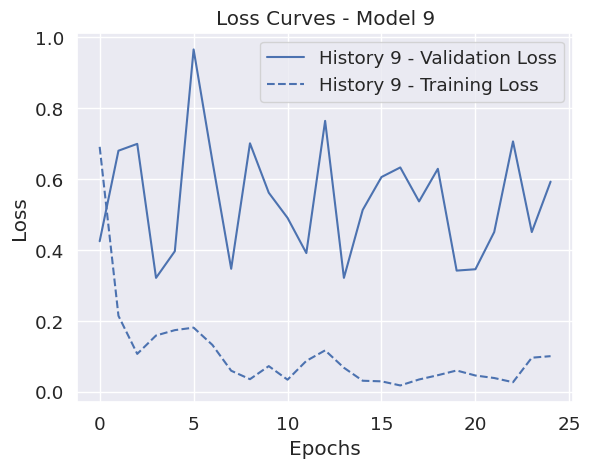

In [ ]:
plot_loss_curves_model(history_9, '9')

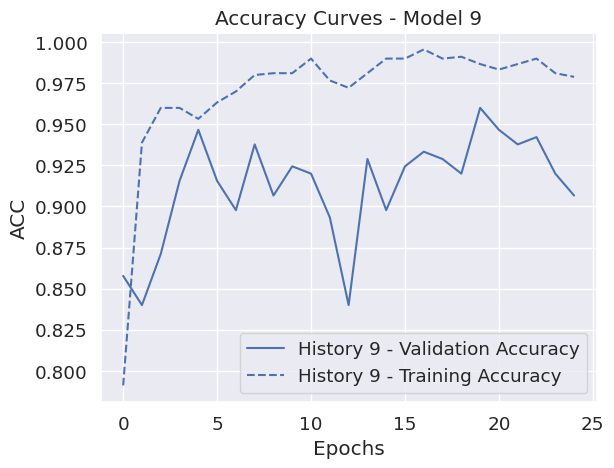

In [ ]:
plot_accuracy_curves_model(history_9, '9')

**CONCLUSIONS**:

- The difference between the accuracies on the training and validation sets appears to be small, suggesting that the model does not have an overfitting problem.
The accuracy on the validation set is also quite high, indicating that the model generalises well.
- The model achieves a good accuracy on the validation set of around 90%, which is a satisfactory result.
- The use of the EfficientNet model as part of the core architecture is beneficial, as this type of model is able to extract relevant features from the images, which helps to produce good results.
- The lack of clear evidence of overfitting suggests that the model and its architecture are well suited to the task.
- The model appears to be well suited to the task and generalises well to the validation set. There are no clear signs of overfitting or underfitting and the accuracy on the validation set is satisfactory.

# Confusion Matrix

The **confusion matrix** is a tool used in the field of machine learning and statistics to evaluate the performance of a classification model. It presents a tabulation of the model's predictions against the true labels (classes) of the test data. It is particularly useful when classification models have more than one class (binary or multiclass).

The confusion matrix consists of four main elements:

- **True Positives (TP)**: The number of samples correctly classified as a particular class. This means the model correctly predicted those samples as positive.

- **True Negatives (TN)**: The number of samples correctly classified as negatives for a particular class. The model correctly predicted that these samples do not belong to the given class.

- **False Positives (FP)**: The number of samples incorrectly classified as positives for a particular class. The model wrongly assigned these samples to the given class when they should be negative.

- **False Negatives (FN)**: The number of samples incorrectly classified as negatives for a particular class. The model mistakenly predicted that these samples do not belong to the given class when they should be positive.

Based on these four values, various performance metrics for the classification model can be calculated, such as:

- **Accuracy**: *(TP + TN) / (TP + TN + FP + FN)* - the proportion of correctly classified samples, both positive and negative, relative to all samples in the test set. It is a general measure of classification model performance.

- **Precision**: *TP / (TP + FP)* - the proportion of correctly predicted positive samples among all samples predicted as positive.

- **Recall**: *TP / (TP + FN)* - the proportion of correctly predicted positive samples among all truly positive samples.

- **F1-score**: *2 * (Precision * Recall) / (Precision + Recall)* - the harmonic mean of precision and recall, useful when balancing precision and recall is important.

The confusion matrix allows for a better understanding of the classification model's behavior, especially with regard to different classes and the errors it makes. It is a valuable tool for assessing the performance of the model before deploying it in real-world applications.

Calculation of values for the confusion matrix for the best model.

In [ ]:
predictions = np.array([])
labels =  np.array([])
for x, y in test_ds:
  predictions = np.concatenate([predictions, np.argmax(model_9.predict(x), axis = -1)])
  labels = np.concatenate([labels, np.argmax(y.numpy(), axis=-1)])

result = confusion_matrix(labels, predictions , normalize='pred')

1/1 [==============================] - 2s 2s/step


Display of confusion matrix for the best model.

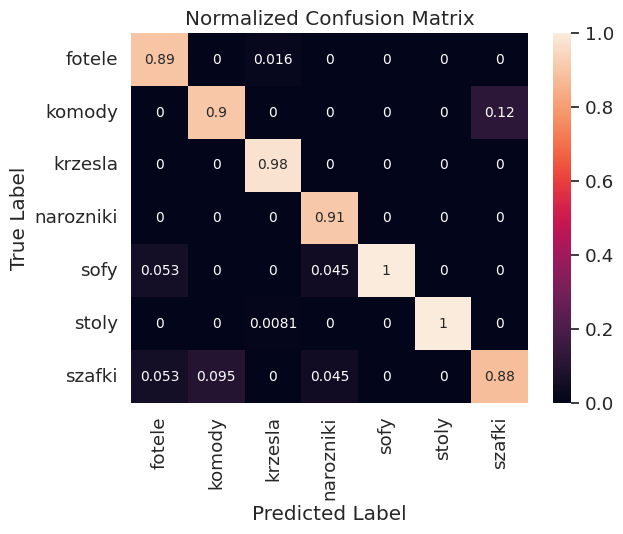

In [ ]:
df_cm = pd.DataFrame(result, train_ds.class_names, train_ds.class_names)

sn.set(font_scale=1.2)
sn.heatmap(df_cm, annot=True, annot_kws={'size': 10})

plt.title('Normalized Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')

plt.show()

This model works very well with sofas, tables and chairs. The model confuses chests of drawers with cupboards and armchairs with corners. This is mainly due to the similarity of these objects. The boundary between these objects is so small that a person would have difficulty correctly classifying a wardrobe or a chest of drawers.

# Comparison of prediction results


In [ ]:
def create_table():
    data = {
            'model': ['Basic model', 'Increased number of neurons','Reduced number of neurons', 'Kernel size (4, 4)', 'Dropout (0.5)',
                      'Dropout (0.5)', 'Regularisation (0.01)', 'Transfer Learning (epochs = 10)', 'Transfer Learning (epochs = 25)'],
            'Loss': [loss_1, loss_2, loss_3, loss_4, loss_5, loss_6, loss_7, loss_8, loss_9],
            'Accuracy': [accuracy_1, accuracy_2, accuracy_3, accuracy_4, accuracy_5,accuracy_6 ,accuracy_7, accuracy_8, accuracy_9]
    }

    df = pd.DataFrame(data)
    return df

data_table = create_table()
print(data_table)

                             model      Loss  Accuracy
0                      Basic model  0.327336  0.917266
1      Increased number of neurons  0.648168  0.899281
2        Reduced number of neurons  0.601212  0.845324
3               Kernel size (4, 4)  0.377171  0.895683
4                    Dropout (0.5)  0.480848  0.845324
5                    Dropout (0.5)  0.382608  0.895683
6            Regularisation (0.01)  0.646162  0.859712
7  Transfer Learning (epochs = 10)  0.343212  0.938849
8  Transfer Learning (epochs = 25)  0.357289  0.953237


## Checking performance on Test Data

Test the model on test data.

Verify that the learned model correctly assigns images to the correct furniture class.

The following code randomly displays 16 images from the test set and assigns them to a class based on the learned model.

1/1 [==============================] - 0s 476ms/step

Number of predicted labels: 144
total_match: 139
Prediction accuracy: 96.52777777777779%



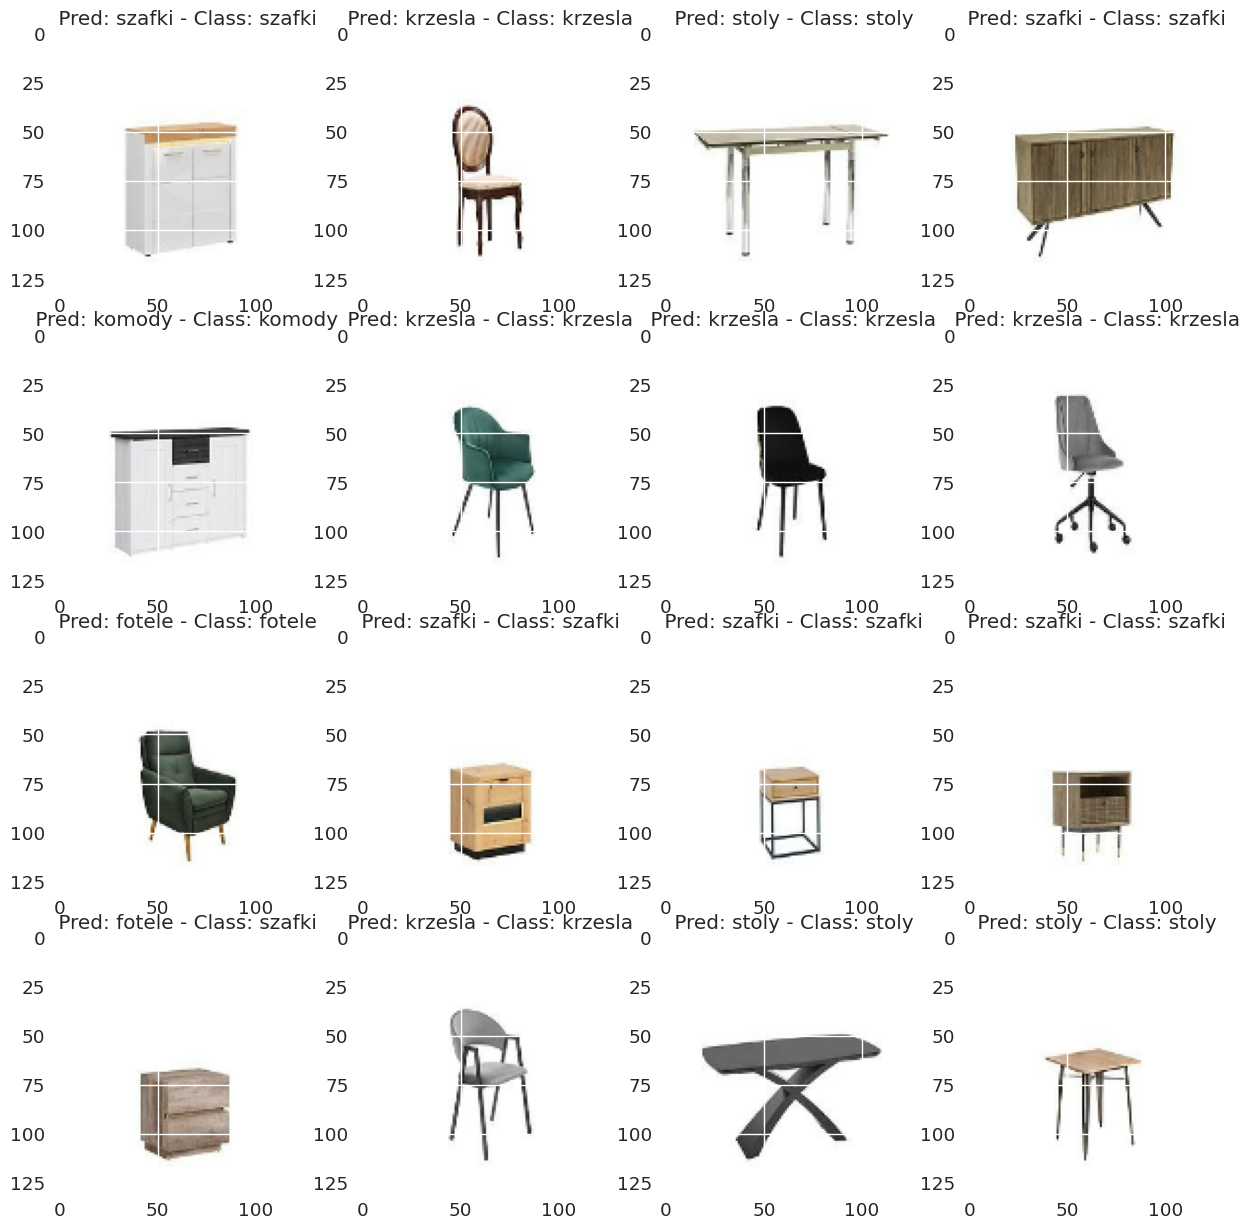

In [ ]:
match_total = 0
number_of_pred_lebel = 0
plt.figure(figsize=(15, 15))

for images, labels in test_ds:
  predictions = model_9.predict(images)
  for i in range(16):
      ax = plt.subplot(4, 4, i + 1)
      plt.imshow(images[i].numpy().astype('uint8'))

      plt.title(f' Pred: {class_names[np.argmax(predictions[i])]} - Class: {class_names[labels[i].numpy().tolist().index(1)]}')
      if class_names[np.argmax(predictions[i])] == class_names[labels[i].numpy().tolist().index(1)]:
        match_total += 1
      number_of_pred_lebel += 1
print()
print('='* 50)
print(f'Number of predicted labels: {number_of_pred_lebel}')
print(f'total_match: {match_total}')
print(f'Prediction accuracy: {match_total/number_of_pred_lebel * 100}%')
print('='* 50)
print()

**CONCLUSIONS:**

- The model achieves a prediction accuracy of about 96.53%, meaning that for 139 out of 144 predicted labels, the model correctly guessed the class of objects in the images.
- The code uses a test set (test_ds) and then predicts labels for each image in the set. For each image in the set, a visualisation is performed by displaying the image, the model's predicted label, and the true label.
- The visualisation shows that the predicted labels often match the true labels of the objects in the images.
- The model appears to perform well on the test set, achieving high prediction accuracy. The visualisation of the results shows that the predicted labels tend to match the actual labels of the objects in the images.

# Conclusions

- Analysis of the learning curves shows that some models may overfit. In the case of overfitting, the accuracy on the training set is much higher than on the validation set. In this case, despite the high training accuracy, the model has problems with its overall ability to make correct predictions on the new data.
- Some models seem to have a better balance between underfitting and overfitting. They are able to achieve high accuracy on both the training and validation sets, suggesting that they are able to generalise patterns. (These latter models)
- The use of regularisation techniques such as Dropout appears to help control overfitting and improve the ability of the model to generalise.
- Visualisation of the prediction results can provide valuable information about how the model works in practice. The correspondence between the predicted labels and the actual labels in the images can provide information about the quality of the model. (Confusion Matrix)
- To select the optimal architecture and hyperparameters for the model, it is useful to experiment with different configurations and regularisations, and to monitor the results on the training and validation sets and analyse the learning curves.
- The amount of data available may not be sufficient for some more complex models or advanced architectures.
- The more complex the model architecture, the more data it needs to learn enough features and avoid overfitting. Some of the more complex models have performed well on training data, but may have limited generalisability due to insufficient data.


# What can be done to improve performance

- For small datasets, it is important to use techniques such as regularisation (e.g. dropout), data augmentation to maximise the use of the available data and avoid overfitting problems.
- Increasing the amount of data available could help improve model performance, especially for more advanced architectures. Where possible, it is worth collecting more training data or using augmentation techniques such as shifts, rotations or reflections to increase the variety of data and improve the model's ability to generalise.
- Choosing the right hyperparameters can have a significant impact on the performance of the model. Different parameter values can be experimented with, such as number of convolutional layers, number of filters, filter sizes, dropout rate, learning rate.
- Instead of using a single division of the set into training and validation sets, cross-validation can be used, which allows a more accurate estimation of model performance. This can help to avoid accidental splits that may affect the results.
- Use an image pre-processing technique, such as batch normalisation, to match the input images to the expectations of the model.